## 1- import libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## 2- Reading the data 

In [2]:
data = pd.read_csv(r"/kaggle/input/healthcare-dataset/healthcare_dataset.csv")

## 3- Data analysis 

In [3]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
data.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [5]:
data.shape

(55500, 15)

In [6]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [8]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [9]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
55495    False
55496    False
55497    False
55498    False
55499    False
Length: 55500, dtype: bool

In [10]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [11]:
data['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

## 4- Data preprocessing 

In [12]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [13]:
# Apply LabelEncoder on the categorical column
data[ 'Gender'] = label_encoder.fit_transform(data[ 'Gender'])
data['Blood Type'] = label_encoder.fit_transform(data['Blood Type'])
data['Medical Condition'] = label_encoder.fit_transform(data['Medical Condition'])
data['Insurance Provider'] = label_encoder.fit_transform(data['Insurance Provider'])
data['Admission Type'] = label_encoder.fit_transform(data['Admission Type'])
data['Medication'] = label_encoder.fit_transform(data['Medication'])
data['Test Results'] = label_encoder.fit_transform(data['Test Results'])

## 5- Spiliting the data 

In [14]:
X = data[['Age', 'Gender', 'Blood Type', 'Medical Condition','Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type','Medication']]
y = data[['Test Results']]

In [15]:
# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6- Building the model 

In [16]:
# Create the neural network model
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(8, activation='relu'),  # Hidden layer
    Dense(3, activation='softmax')  # Output layer (3 classes for the Iris dataset)
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.3268 - loss: 178.7273
Epoch 2/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3296 - loss: 8.2881
Epoch 3/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3319 - loss: 6.1828
Epoch 4/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3347 - loss: 5.4346
Epoch 5/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3306 - loss: 4.8689
Epoch 6/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3341 - loss: 4.4415
Epoch 7/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3309 - loss: 3.8810
Epoch 8/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3334 - loss: 2.8701
Epoch 9/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.3312 - loss: 1.9989
Epoch 10/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3330 - loss: 1.1080


## 7- Evaluating the model 

In [19]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.34


## 8- Data visualization 

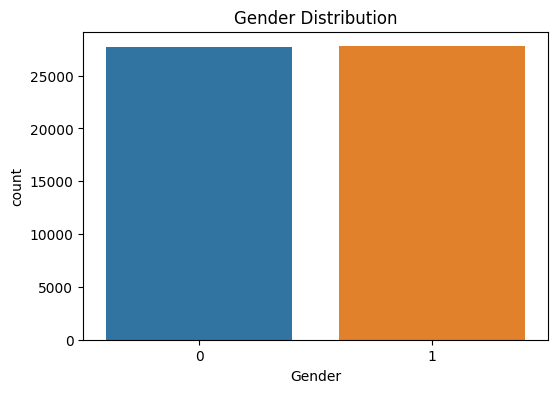

In [21]:
df = pd.DataFrame(data)

# 1. Bar Plot of Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

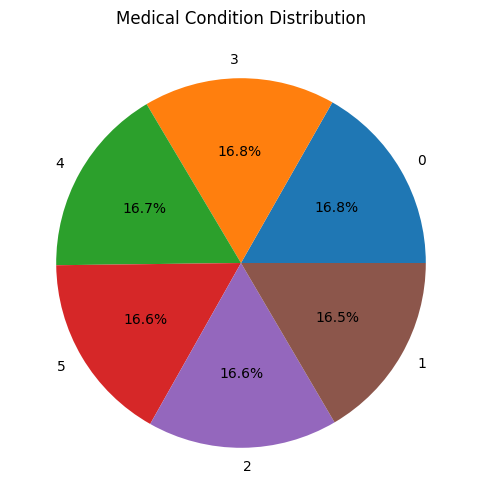

In [22]:
# 2. Pie Chart of Medical Condition Distribution
plt.figure(figsize=(6, 6))
df['Medical Condition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Medical Condition Distribution')
plt.ylabel('')
plt.show()

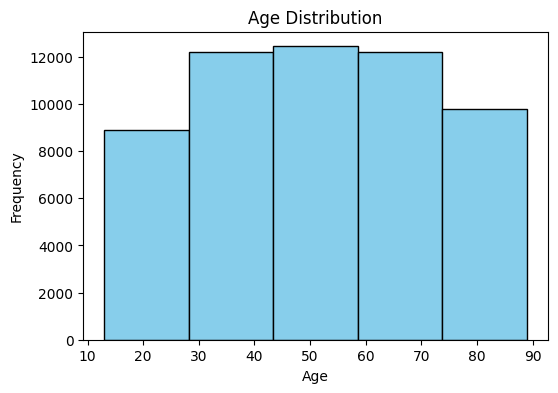

In [23]:
# 3. Histogram of Age Distribution
plt.figure(figsize=(6, 4))
plt.hist(df['Age'], bins=5, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

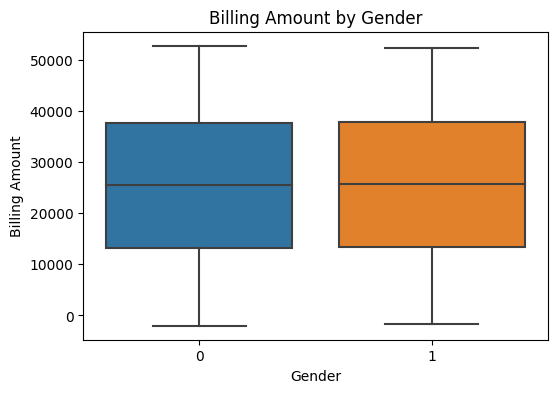

In [24]:
# 4. Box Plot of Billing Amount by Gender
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Billing Amount', data=df)
plt.title('Billing Amount by Gender')
plt.show()

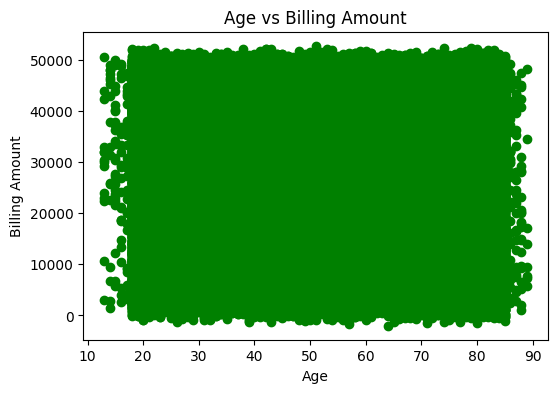

In [25]:
# 5. Scatter Plot of Age vs Billing Amount
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Billing Amount'], color='green')
plt.title('Age vs Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()

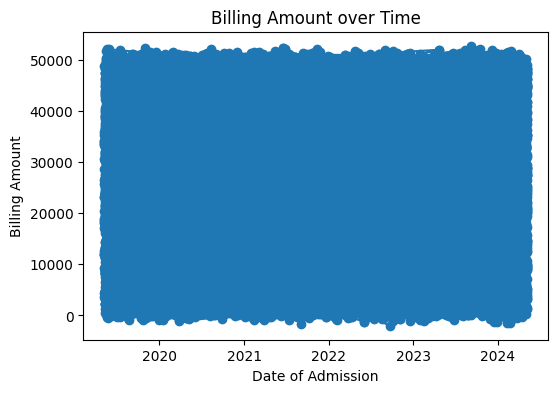

In [26]:
# Convert 'Date of Admission' to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# 6. Line Plot of Billing Amount over Time
plt.figure(figsize=(6, 4))
plt.plot(df['Date of Admission'], df['Billing Amount'], marker='o')
plt.title('Billing Amount over Time')
plt.xlabel('Date of Admission')
plt.ylabel('Billing Amount')
plt.show()

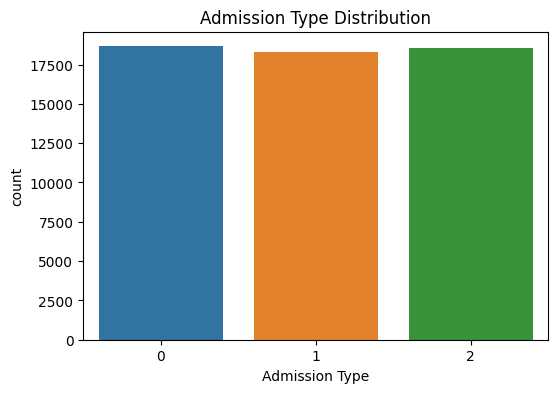

In [27]:
# 7. Count Plot of Admission Type
plt.figure(figsize=(6, 4))
sns.countplot(x='Admission Type', data=df)
plt.title('Admission Type Distribution')
plt.show()

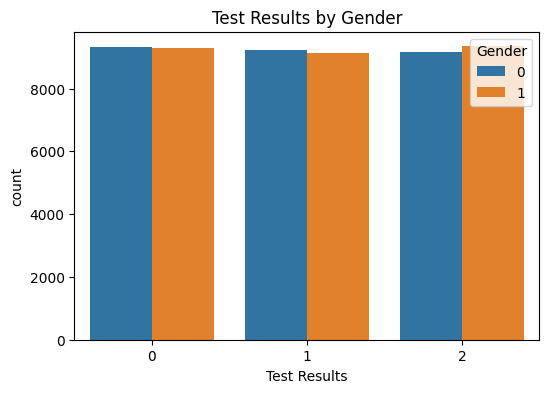

In [28]:
# 8. Bar Plot of Test Results by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Test Results', hue='Gender', data=df)
plt.title('Test Results by Gender')
plt.show()

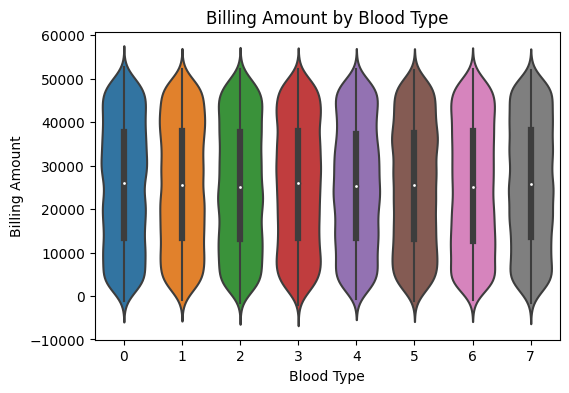

In [29]:
# 9. Violin Plot of Billing Amount by Blood Type
plt.figure(figsize=(6, 4))
sns.violinplot(x='Blood Type', y='Billing Amount', data=df)
plt.title('Billing Amount by Blood Type')
plt.show()